# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from category_encoders import OneHotEncoder,BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import re
import ast
import joblib
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from collections import Counter
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler
import matplotlib.patches as mpatches
import math
import lightgbm as lgb
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import pickle
import warnings
warnings.filterwarnings('ignore')

# Exploring The Data

In [2]:
def data_info(data):

    """
    This function returns a DataFrame containing the summary information for each column 
    """

    Names=[col for col in data]
    data_types=[data[col].dtype for col in data.columns]
    top_10_unique_values=[data[col].value_counts().head(10).index.to_list() for col in data.columns]
    nunique_values=[data[col].nunique() for col in data.columns]
    nulls=[data[col].isnull().sum() for col in data.columns]
    percent_of_Nulls= [data[col].isnull().sum()/len(data)*100 for col in data.columns]
    duplicates=data.duplicated().sum()


    info_df=pd.DataFrame({'Name':Names,
                          'Data_Type':data_types,
                          'Top_10_Unique_Values':top_10_unique_values,
                          'Nunique_Values':nunique_values,
                          'Nulls':nulls,
                          'Percent_of_Nulls':percent_of_Nulls,
                          'Duplicates':duplicates})
    return info_df

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read And Merge Csv's

In [4]:
df1=pd.read_csv("info_base_games.csv")
data_info(df1)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steam_appid,int64,"[22330, 1318940, 1540920, 1539750, 1539770, 15...",3343,0,0.000000,0
1,name,object,"[Forkdrift, Ikonei Island: An Earthlock Advent...",3344,0,0.000000,0
2,metacritic,float64,"[70.0, 73.0, 81.0, 76.0, 80.0, 78.0, 75.0, 79....",41,3179,95.065789,0
3,steam_achievements,bool,"[False, True]",2,0,0.000000,0
4,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
5,workshop_support,bool,"[False, True]",2,0,0.000000,0
6,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",520,8,0.239234,0
7,achievements_total,float64,"[10.0, 12.0, 16.0, 6.0, 15.0, 20.0, 8.0, 14.0,...",126,1493,44.647129,0
8,release_date,object,"[Coming soon, Q1 2025, Jan 31, 2025, Dec 10, 2...",1712,0,0.000000,0
9,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",5,0,0.000000,0


In [5]:
df2=pd.read_csv("demos.csv")
data_info(df2)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,demo_appid,int64,"[2518160, 936750, 944170, 945640, 950770, 9506...",494,0,0.0,0
1,full_game_appid,int64,"[1513420, 1449180, 3077200, 935360, 800650, 83...",493,0,0.0,0
2,name,object,"[Traxion Demo, Fire Place Demo, My Magical Dem...",494,0,0.0,0


In [6]:
df3=pd.read_csv("dlcs.csv")
data_info(df3)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,dlc_appid,int64,"[2573710, 1669710, 1667370, 1667410, 1667430, ...",2928,0,0.0,0
1,base_appid,int64,"[1196310, 866510, 1465360, 1938090, 1463920, 8...",514,0,0.0,0
2,name,object,[Fantasy Grounds - Aegis of Empires 1: The Boo...,2919,0,0.0,0


In [7]:
df4=pd.read_csv("gamalytic_cls_sales.csv")
data_info(df4)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steamId,int64,"[1938090, 3176810, 909010, 1676350, 3139690, 3...",3343,0,0.0,0
1,price,float64,"[0.0, 0.99, 4.99, 9.99, 1.99, 2.99, 19.99, 14....",59,0,0.0,0
2,copiesSold,object,"[Bronze, Silver, Gold, Platinum]",4,0,0.0,0
3,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.0,0
4,reviewScore,int64,"[100, 0, 50, 67, 88, 80, 75, 83, 86, 90]",93,0,0.0,0
5,aiContent,float64,[],0,3343,100.0,0


In [8]:
df1["appid"] = pd.to_numeric(df1['steam_appid'], errors='coerce').astype('Int64')
df2["appid"] = pd.to_numeric(df2['full_game_appid'], errors='coerce').astype('Int64')
df3["appid"] = pd.to_numeric(df3['base_appid'], errors='coerce').astype('Int64')
df4["appid"] = pd.to_numeric(df4['steamId'], errors='coerce').astype('Int64')

In [9]:
print(df1["appid"].shape)
print(df2["appid"].shape)
print(df3["appid"].shape)
print(df4["appid"].shape)

(3344,)
(494,)
(2928,)
(3343,)


In [10]:
merged = pd.merge(df1,   df4, on='appid', how='inner')
merged = pd.merge(merged, df2,   on='appid', how='left')
df = pd.merge(merged, df3,  on='appid', how='left')

In [11]:
df.shape

(5759, 23)

In [12]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,steam_appid,int64,"[1196310, 1938090, 866510, 1465360, 1463920, 8...",3343,0,0.000000,0
1,name_x,object,"[Fantasy Grounds VTT, SnowRunner, !AnyWay!, Ca...",3344,0,0.000000,0
2,metacritic,float64,"[88.0, 78.0, 73.0, 81.0, 79.0, 70.0, 80.0, 84....",41,5429,94.269839,0
3,steam_achievements,bool,"[False, True]",2,0,0.000000,0
4,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
5,workshop_support,bool,"[False, True]",2,0,0.000000,0
6,genres,object,"[Indie, RPG, Strategy, Casual, Indie, Action, ...",520,9,0.156277,0
7,achievements_total,float64,"[10.0, 50.0, 12.0, 20.0, 16.0, 6.0, 14.0, 15.0...",126,3010,52.266018,0
8,release_date,object,"[Nov 5, 2020, Oct 27, 2022, Sep 18, 2024, Jun ...",1712,0,0.000000,0
9,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",5,0,0.000000,0


# Drop Unused Columns

In [13]:
dropped_list=["metacritic","achievements_total","aiContent","full_game_appid","steam_appid","demo_appid","name_y",
              "base_appid","dlc_appid","name"]

df.drop(columns=dropped_list,inplace=True)
df.drop(["steamId","appid"],axis=1,inplace=True)

In [14]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Fantasy Grounds VTT, SnowRunner, !AnyWay!, Ca...",3344,0,0.000000,2415
1,steam_achievements,bool,"[False, True]",2,0,0.000000,2415
2,steam_trading_cards,bool,"[False, True]",2,0,0.000000,2415
3,workshop_support,bool,"[False, True]",2,0,0.000000,2415
4,genres,object,"[Indie, RPG, Strategy, Casual, Indie, Action, ...",520,9,0.156277,2415
5,release_date,object,"[Nov 5, 2020, Oct 27, 2022, Sep 18, 2024, Jun ...",1712,0,0.000000,2415
6,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",5,0,0.000000,2415
7,price,float64,"[49.99, 0.0, 0.99, 4.99, 9.99, 1.99, 19.99, 2....",59,0,0.000000,2415
8,copiesSold,object,"[Platinum, Bronze, Silver, Gold]",4,0,0.000000,2415
9,publisherClass,object,"[Indie, Hobbyist, AA, AAA]",4,0,0.000000,2415


# Drop Duplicates

In [15]:
df.drop_duplicates(inplace=True)

# Split Target Column

In [16]:
test=df["copiesSold"]
df.drop(["copiesSold"],axis=1,inplace=True)

test=test.map({"Bronze":1,"Silver":2,"Gold":3,"Platinum":4})

In [17]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,name_x,object,"[Forkdrift, Ikonei Island: An Earthlock Advent...",3344,0,0.000000,0
1,steam_achievements,bool,"[False, True]",2,0,0.000000,0
2,steam_trading_cards,bool,"[False, True]",2,0,0.000000,0
3,workshop_support,bool,"[False, True]",2,0,0.000000,0
4,genres,object,"[Casual, Indie, Action, Indie, Action, Adventu...",520,8,0.239234,0
5,release_date,object,"[Coming soon, Q1 2025, Jan 31, 2025, Dec 10, 2...",1712,0,0.000000,0
6,supported_platforms,object,"[['windows'], ['windows', 'mac', 'linux'], ['w...",5,0,0.000000,0
7,price,float64,"[0.0, 0.99, 4.99, 9.99, 1.99, 2.99, 19.99, 14....",59,0,0.000000,0
8,publisherClass,object,"[Hobbyist, Indie, AA, AAA]",4,0,0.000000,0
9,reviewScore,int64,"[100, 0, 50, 67, 88, 80, 75, 83, 86, 90]",93,0,0.000000,0


In [18]:
# new_row = [None, None, None, None, None,None, None, None, None, None]

# new_df = pd.DataFrame([new_row], columns=df.columns)

# df = pd.concat([df, new_df], ignore_index=True)

# Convert realese_date column

In [19]:
year_anchor = pd.Timestamp('2026-01-01')

df['age_years'] = df["release_date"].str.replace(r".*-25$", "Jan 1, 2025", regex=True)
df['age_years'] = df['age_years'].apply(lambda x: "Jan 1, 2025" if x in ["Q1 2025", "Q2 2025", "Q3 2025", "Q4 2025", "2025"] else x)
df['age_years'] = pd.to_datetime(df['age_years'], errors='coerce')
df['age_years'] = df['age_years'].fillna(year_anchor)
df['age_years'] = (year_anchor.year - df['age_years'].dt.year)
df.drop(columns=['release_date'], inplace=True)

# Handling Null Input

In [20]:
Null_dict = joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\Null_Dict.pkl')
df.fillna(Null_dict,inplace=True)

# Handling new Unknown values

In [21]:
Unknown_Values={"publisherClass":"Hobbyist"}

publish_List=["Hobbyist", "Indie", "AA", "AAA"]

for idx,publish in df["publisherClass"].items():
    if publish not in publish_List:
        df["publisherClass"][idx]=Unknown_Values["publisherClass"]

# Create the feature engineering columns

# 1-GameRating

In [22]:
publisher_encode = df["publisherClass"].map({ "Hobbyist": 0.01, "Indie": 0.5, "AA": 3, "AAA": 10 })
extras_mean=(df["steam_achievements"]+df["steam_trading_cards"]+df["workshop_support"])/3

df["1-GameRating"]=((extras_mean+1)*(df["reviewScore"]+1)*publisher_encode)*(df['age_years'] + 1)

# 2-GameRatingWithGenres

In [23]:
dict1 = joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\dict1_genres.pkl')

df['genresTemp'] = df['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])
genre_means = []

for idx, genre_list in df["genresTemp"].items():
    mean1 = 0
    for genre in genre_list:
        if genre in dict1:
            mean1 += dict1[genre]
    if mean1 == 0:
        mean1 = 1
    else:
        mean1 /= len(genre_list)
    genre_means.append(mean1)

df.drop("genresTemp",inplace=True,axis=1)
genre_means = [x + 1 for x in genre_means]
df["2-GameRatingWithGenres"] = (genre_means * df["1-GameRating"])/1e7

# 3-RatingOverPrice

In [24]:
df["3-RatingOverPrice"]=df["2-GameRatingWithGenres"]/(df["price"]+1)

# 4-GameRatingWithPlatforms

In [25]:
li=[]
dict2=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\dict2_platforms.pkl')

for idx,platform in df["supported_platforms"].items():
    sum1=1
    platform_list1 = ast.literal_eval(platform)
    for j in platform_list1:
        if j  in dict2:
            sum1+=dict2[j]
    li.append(sum1)

df["4-GameRatingWithPlatforms"]=df["3-RatingOverPrice"]*li

# 5-NameAsCopiesSold

In [26]:
def clean_and_lemmatize(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    cleaned_words = []
    for word in words:
        word = word.strip().lower()
        word = re.sub(r'[^a-zA-Z]', '', word)
        if word and word not in stop_words:
            lemma = lemmatizer.lemmatize(word)
            cleaned_words.append(lemma)
    return cleaned_words

df['name'] = df['name_x'].apply(clean_and_lemmatize)

dict12=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\dict12_names.pkl')

name_means = []

for idx, names_list in df["name"].items():
    mean1 = 0
    if len(names_list) != 0:
        for name in names_list:
            if name in dict12:
                mean1 += dict12[name]
        mean1 /= len(names_list)
    name_means.append(mean1)

df.drop(["name_x","name"],inplace=True,axis=1)
df["5-NameAsCopiesSold"] = name_means
df["5-NameAsCopiesSold"] +=1
df["5-NameAsCopiesSold"] /= 1e4

# 6-GameRatingWithNames

In [27]:
df["6-GameRatingWithNames"] = df["5-NameAsCopiesSold"] * df["4-GameRatingWithPlatforms"]

In [28]:
supported_list={"mac":0,"linux":0}

for idx,platforms in df["supported_platforms"].items():
    platforms_list = ast.literal_eval(platforms)
    for j in platforms_list:
        if j  not in supported_list.keys():
            platforms_list.remove(j)

    df["supported_platforms"][idx]=platforms_list

# Handling genres Column

In [29]:
mlb_platforms=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\mlb_platforms_encoder.pkl')

support_encoded = pd.DataFrame(mlb_platforms.transform(df['supported_platforms']), columns=mlb_platforms.classes_, 
                                   index=df.index)

df = pd.concat([df, support_encoded], axis=1)
df = df.drop(columns=['supported_platforms',"windows"])

In [30]:
genre_list=["Action",'Adventure', 'Casual',
       'Early Access', 'Free To Play', 'Indie', 'Massively Multiplayer', 'RPG',
       'Racing', 'Simulation', 'Sports', 'Strategy']

df['genres'] = df['genres'].apply(lambda x: [g.strip() for g in x.split(',')])

for idx,genres_list in df["genres"].items():
    for j in genres_list:
        if j  not in genre_list:
            genres_list.remove(j)

    df["genres"][idx]=genres_list

# Encoding

In [31]:
mlb_genres=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\mlb_genres_encoder.pkl')
genres_encoded = pd.DataFrame(mlb_genres.transform(df['genres']), columns=mlb_genres.classes_, 
                                   index=df.index)

df = pd.concat([df, genres_encoded], axis=1)

drop_list=['Accounting',
       'Animation & Modeling', 'Audio Production',
       'Design & Illustration','Education',
       'Game Development', 'Gore', 'Nudity',
       'Photo Editing', 'Sexual Content',
       'Software Training', 'Utilities',
       'Video Production', 'Violent', 'Web Publishing','genres']

df = df.drop(columns=drop_list)

In [32]:
one_Hot_list = ["steam_achievements", "steam_trading_cards", "workshop_support","publisherClass"]
one_hot_encoder=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\onehot_encoder.pkl')

one_hot_encoded = pd.DataFrame(one_hot_encoder.transform(df[one_Hot_list]), columns=one_hot_encoder.get_feature_names(), 
                                   index=df.index)

df = pd.concat([df, one_hot_encoded], axis=1)
df = df.drop(columns=one_Hot_list)

# Scaling

In [33]:
robust_scaler=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\robust_scaler.pkl')

numerical_columns=["price","1-GameRating","2-GameRatingWithGenres","4-GameRatingWithPlatforms",
                   "3-RatingOverPrice","5-NameAsCopiesSold","6-GameRatingWithNames"]

df[numerical_columns] = robust_scaler.transform(df[numerical_columns])

minmax_scaler=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\minmax_scaler.pkl')
df["reviewScore"] = minmax_scaler.transform(df[["reviewScore"]])

In [34]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,price,float64,"[-0.46076923076923076, -0.38461538461538464, -...",59,0,0.0,1
1,reviewScore,float64,"[1.0, 0.0, 0.5, 0.67, 0.88, 0.8, 0.75, 0.83000...",93,0,0.0,1
2,age_years,int32,"[5, 2, 7, 8, 4, 3, 6, 1, 9, 16]",22,0,0.0,1
3,1-GameRating,float64,"[-0.42799771591974123, -0.41852970774834003, -...",1084,0,0.0,1
4,2-GameRatingWithGenres,float64,"[-0.3666859022473106, -0.36674716544707703, -0...",3078,0,0.0,1
5,3-RatingOverPrice,float64,"[-0.13152439608385813, -0.17704467327371462, -...",3285,0,0.0,1
6,4-GameRatingWithPlatforms,float64,"[-0.1387384418436327, -0.20391337531503326, -0...",3298,0,0.0,1
7,5-NameAsCopiesSold,float64,"[-0.4346722338975708, -0.43081419631859824, -0...",1525,0,0.0,1
8,6-GameRatingWithNames,float64,"[-0.13225782758372553, -0.13086394543262056, 1...",3343,0,0.0,1
9,linux,int32,"[0, 1]",2,0,0.0,1


# Model Prediction

``{"Bronze":1,"Silver":2,"Gold":3,"Platinum":4}``

In [35]:
model=joblib.load(r'C:\Users\moham\Downloads\College\Machine_Learning\PROJECT\Classification\Models\lgb_model.pkl')

y_pred = model.predict(df)
acc=accuracy_score(test, y_pred)

print(acc)
print(classification_report(test, y_pred))

0.6223086124401914
              precision    recall  f1-score   support

           1       0.87      0.78      0.83      1584
           2       0.51      0.42      0.46       923
           3       0.33      0.52      0.40       513
           4       0.54      0.56      0.55       324

    accuracy                           0.62      3344
   macro avg       0.56      0.57      0.56      3344
weighted avg       0.66      0.62      0.63      3344



# Plotting Results

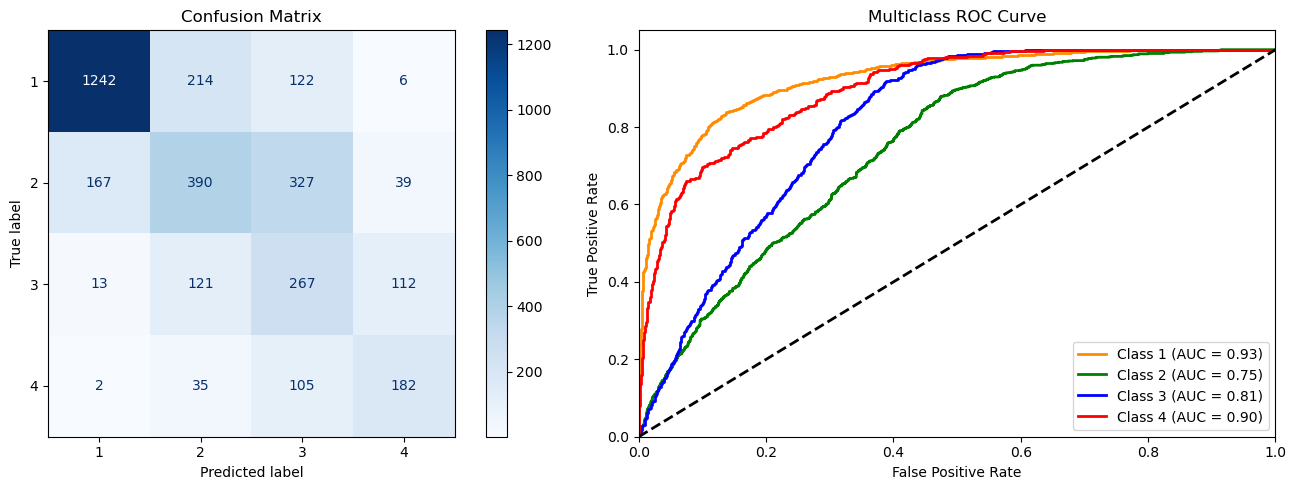

In [36]:
classes = np.unique(test)
y_test_bin = label_binarize(test, classes=classes)
y_prob = model.predict_proba(df)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_estimator(model, df, test, cmap='Blues', ax=axs[0])
axs[0].set_title("Confusion Matrix")

colors = ['darkorange', 'green', 'blue', 'red', 'purple', 'brown']
for i, color in zip(range(len(classes)), colors):
    axs[1].plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

axs[1].plot([0, 1], [0, 1], 'k--', lw=2)
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('Multiclass ROC Curve')
axs[1].legend(loc="lower right")

plt.tight_layout()
plt.show()
